In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt


In [2]:
import sys
sys.path.append('../../../Code')
import loadData 
import RunML
import FS
import metric

2025-03-28 02:24:27.330726: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-28 02:24:28.007220: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-28 02:24:28.021977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743143068.041655 3099113 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743143068.047563 3099113 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-28 02:24:30.130285: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
ARF_16S_metadata = pd.read_csv('../data/ARF_16S_metadata.csv',index_col = 0)
ARF_16S_ctb_family = pd.read_csv('../data/ARF_16S_ctb_Family.csv',index_col = 0)

In [4]:
ARF_16S_metadata.head(3)

,Sample,Sample_name,Type,Location,Depth,Study_day,Sort1,Sort2,Stage,Stage1,...,CN_ratio,copies.gdw,log.copies.gdw,fungal.bacterial.ratio,log.f.b.ratio,Chao1,Shannon,InvSimpson,Phase,Donor
SP_A0,con15_mean,A0,con15,control,core,0,A,con,Initial,Control,...,13.441867,4.455430e+09,9.648889,0.018761,-1.726748,4519.472160,6.624858,208.516238,Initial,Control
SP_A0_CONINT,conint_mean,A0_CONINT,conint,control,interface,0,A,con,Initial,Control,...,15.469767,1.846670e+09,9.266390,0.052861,-1.276864,4444.733485,6.462025,149.034180,Initial,Control
SP_A0_CORE1,gr_15_sp1,A0_CORE1,gr15,grave,core,0,A,DA,Initial,D_Initial,...,13.054900,5.649630e+09,9.752020,0.018689,-1.728420,4506.556818,6.249346,121.798808,Initial,Donor1


In [5]:
ARF_16S_ctb_family

,Xiphinematobacteraceae,Xanthobacteraceae,Chthoniobacteraceae,Rhodanobacteraceae,Corynebacteriaceae,Subgroup_6_fa,Burkholderiaceae,Mycobacteriaceae,Enterococcaceae,Nocardiaceae,...,Gracilibacteria_unclassified,Armatimonadetes_unclassified,Catenulisporaceae,27F-1492R,bac2nit3,Candidatus_Azambacteria_fa,Clostridia_unclassified,Bacilli_unclassified,Lineage_IIc_fa,Victivallaceae
SP_A0,234.172682,443.550609,378.533253,8.815913,0.000000,1032.012783,109.647914,76.588242,0.000000,6.060940,...,0.000000,0.000000,0.550995,1.101989,0.000000,1.101989,0.0,0.0,0.550995,0.0
SP_A0_CONINT,139.478198,346.212874,262.706509,50.555204,0.000000,992.145888,352.080888,64.999549,0.000000,22.117902,...,0.902772,0.000000,0.000000,0.000000,0.000000,0.451386,0.0,0.0,0.000000,0.0
SP_A0_CORE1,459.284589,785.812464,375.808777,5.028663,0.000000,836.434342,94.874116,142.814040,0.335244,11.733548,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
SP_A0_CORE2,351.996220,773.551723,561.724020,2.624879,0.787464,922.119852,93.708166,98.432947,0.000000,4.724781,...,0.000000,0.000000,0.262488,0.000000,0.000000,1.574927,0.0,0.0,0.524976,0.0
SP_A0_CORE3,392.253406,671.991539,580.994584,0.911793,0.000000,855.626675,70.937506,69.843354,0.182359,2.917738,...,0.182359,0.182359,0.000000,0.000000,0.000000,0.182359,0.0,0.0,0.182359,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WIN_V384_CORE2,299.807903,870.266191,740.257958,15.436334,0.000000,763.927003,116.287047,155.735456,0.000000,34.645993,...,0.000000,0.000000,0.000000,0.343030,0.686059,0.000000,0.0,0.0,0.000000,0.0
WIN_V384_CORE3,160.550459,452.981651,203.555046,632.167431,30.103211,409.977064,564.793578,153.383028,5.733945,64.506881,...,0.000000,0.000000,0.000000,0.000000,1.433486,0.000000,0.0,0.0,0.000000,0.0
WIN_V384_IN1,407.015004,741.642538,531.718873,22.045275,3.290340,868.649645,147.407212,205.317189,0.000000,123.716768,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
WIN_V384_IN2,37.829836,265.513757,214.995653,157.663479,2.349679,172.466458,686.106346,218.755140,0.000000,345.637820,...,0.000000,0.000000,0.000000,0.000000,0.234968,0.000000,0.0,0.0,0.000000,0.0


In [6]:
featurs_family = ARF_16S_ctb_family.columns
print(featurs_family)

Index(['Xiphinematobacteraceae', 'Xanthobacteraceae', 'Chthoniobacteraceae',
       'Rhodanobacteraceae', 'Corynebacteriaceae', 'Subgroup_6_fa',
       'Burkholderiaceae', 'Mycobacteriaceae', 'Enterococcaceae',
       'Nocardiaceae',
       ...
       'Gracilibacteria_unclassified', 'Armatimonadetes_unclassified',
       'Catenulisporaceae', '27F-1492R', 'bac2nit3',
       'Candidatus_Azambacteria_fa', 'Clostridia_unclassified',
       'Bacilli_unclassified', 'Lineage_IIc_fa', 'Victivallaceae'],
      dtype='object', length=442)


In [7]:
target_variable = ARF_16S_metadata['Phase']
print(target_variable)

SP_A0              Initial
SP_A0_CONINT       Initial
SP_A0_CORE1        Initial
SP_A0_CORE2        Initial
SP_A0_CORE3        Initial
                    ...   
WIN_V384_CORE2    RECOVERY
WIN_V384_CORE3    RECOVERY
WIN_V384_IN1      RECOVERY
WIN_V384_IN2      RECOVERY
WIN_V384_IN3      RECOVERY
Name: Phase, Length: 312, dtype: object


In [8]:
# Filtering: Keep rows where phase is not in 'Initial' or 'RECOVERY'
mask = ~target_variable.isin(['Initial', 'RECOVERY'])

# Apply mask to both DataFrame and target
ARF_16S_ctb_family = ARF_16S_ctb_family[mask]
target_variable = target_variable[mask]

# Print results
print(ARF_16S_ctb_family)
print(target_variable)

                Xiphinematobacteraceae  Xanthobacteraceae  \
SP_B8                       445.884895         692.889413   
SP_B8_CONINT                212.040512         517.895331   
SP_B8_CORE1                 233.015395         443.858768   
SP_B8_CORE2                 326.668092         846.877673   
SP_B8_CORE3                 451.785281         866.164683   
...                                ...                ...   
WIN_M172_CORE2              241.177561         882.641040   
WIN_M172_CORE3              361.038082         686.675170   
WIN_M172_IN1                  5.276724          93.966270   
WIN_M172_IN2                 37.138958         499.809831   
WIN_M172_IN3                 52.809281         257.337027   

                Chthoniobacteraceae  Rhodanobacteraceae  Corynebacteriaceae  \
SP_B8                    480.259281            2.946376            0.000000   
SP_B8_CONINT             393.011338           26.631158            0.000000   
SP_B8_CORE1              335.9

In [9]:
# 

### Select feartures using SelectMicro

dict_keys(['selected_data', 'selected_columnames', 'selected_indices', 'relative_abundance_data', 'H_score'])

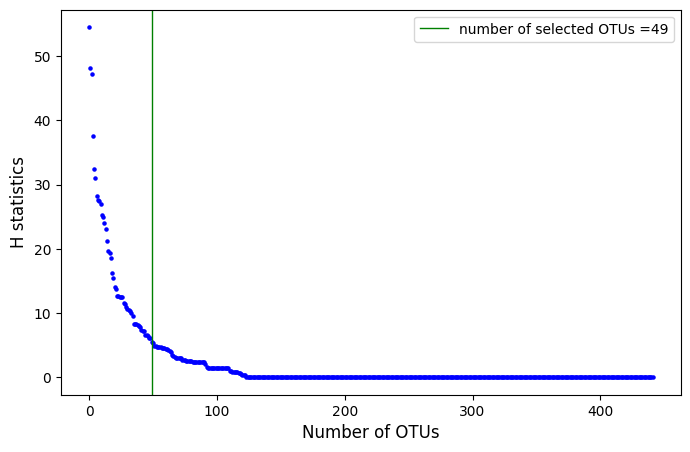

In [10]:
selectedresult=FS.SelectMicro_fun(ARF_16S_ctb_family,target_variable,p_cutoff = 0.05)
    
selectedresult.keys()

In [11]:
data = selectedresult['relative_abundance_data']


selectedOTU_index= selectedresult['selected_indices']
selectedASV = selectedresult['selected_columnames']
X_FS = selectedresult['selected_data']


In [12]:

print("The response variable and its counts are:")
print(target_variable.value_counts())

The response variable and its counts are:
Phase
DECLINE    64
BLOOM      48
CLIMAX     48
Name: count, dtype: int64


In [13]:
print(f'The shape of the original dataset is ',np.shape(data))
print(f'The shape of the SelectMicro dataset is ',np.shape(X_FS))


The shape of the original dataset is  (160, 442)
The shape of the SelectMicro dataset is  (160, 49)


In [14]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y = le.fit_transform(target_variable)

In [15]:
custom_phaseorder = ['Initial', 'BLOOM', 'CLIMAX', 'DECLINE', 'RECOVERY']
custom_mapping = {category: i for i, category in enumerate(custom_phaseorder)}

In [16]:
custom_mapping

{'Initial': 0, 'BLOOM': 1, 'CLIMAX': 2, 'DECLINE': 3, 'RECOVERY': 4}

In [17]:
y = [custom_mapping[category] for category in target_variable]
y = np.array(y)
print(y)

print(target_variable)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3]
SP_B8               BLOOM
SP_B8_CONINT        BLOOM
SP_B8_CORE1         BLOOM
SP_B8_CORE2         BLOOM
SP_B8_CORE3         BLOOM
                   ...   
WIN_M172_CORE2    DECLINE
WIN_M172_CORE3    DECLINE
WIN_M172_IN1      DECLINE
WIN_M172_IN2      DECLINE
WIN_M172_IN3      DECLINE
Name: Phase, Length: 160, dtype: object


In [18]:
X_lasso_ft,selectedOTU_index_Lasso  = RunML.LassoFS_CV(data,y)

X_FS_lasso_ft,xlabel_FS_lasso_ft0  = RunML.LassoFS_CV(X_FS,y)
selectedOTU_index_FS_lasso = selectedOTU_index[xlabel_FS_lasso_ft0]

data_subset = {"AllFeatures":data,
               "SelectMicro": X_FS,
               "Lasso_finetune":X_lasso_ft,
               "FS_Lassofinetune":X_FS_lasso_ft
              }

Best alpha: 0.1
Best alpha: 0.05


In [19]:
print(f'The shape of the original dataset is ',np.shape(data))
print(f'The shape of the SelectMicro dataset is ',np.shape(X_FS))
print(f'The shape of the Lasso_finetune selected dataset is ',np.shape(X_lasso_ft))
print(f'The shape of the FS_Lasso_finetune selected dataset is ',np.shape(X_FS_lasso_ft))


The shape of the original dataset is  (160, 442)
The shape of the SelectMicro dataset is  (160, 49)
The shape of the Lasso_finetune selected dataset is  (160, 12)
The shape of the FS_Lasso_finetune selected dataset is  (160, 18)


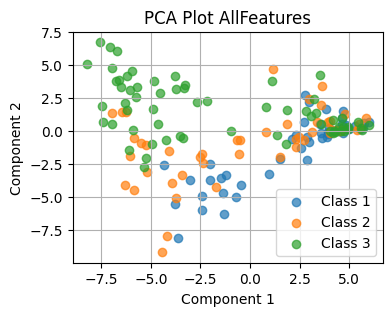

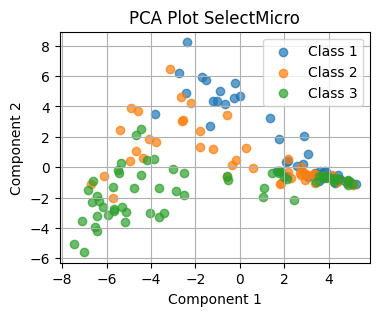

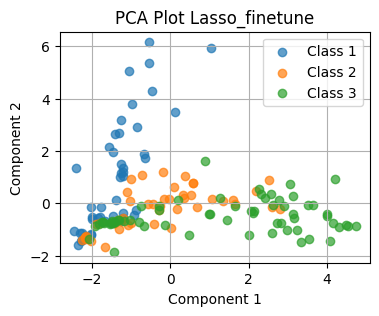

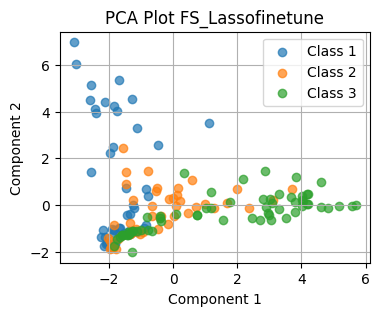

In [20]:
for datatype, subset in data_subset.items():   
    RunML.plot_dim_reduction(subset, y,method='PCA', datalabel=datatype)

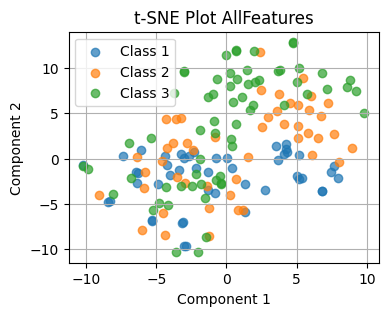

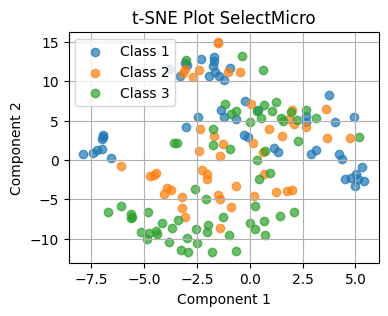

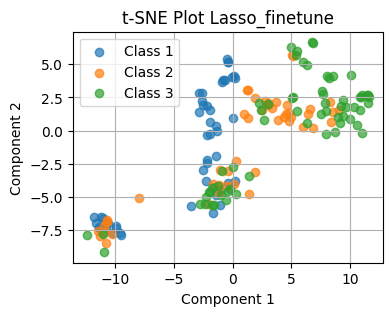

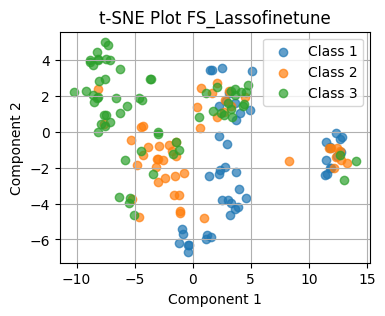

In [21]:
for datatype, subset in data_subset.items():   
    RunML.plot_dim_reduction(subset, y,method='TSNE', datalabel=datatype)

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
import shap
def RF_model_SCV_multi(X, y, plot=False,columnnames=None,SMOTE=False,k=5):
     # Initialize the classifier
   
    clf = RandomForestClassifier(n_jobs=5, random_state=777)

    # Set up 5-fold cross-validation
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=777)

    # Lists to store the results
    accuracies = []
    roc_aucs = []
    mcc_s = []
    f_scores = []
    y_true_all = []
    
    x_true_all = np.empty((0, X.shape[1]))  # Ensure correct number of columns
    shap_values_all = np.empty((0, X.shape[1]))   # Store SHAP values for each fold
    y_pred_all = []
    y_prob_all = []
    

    for train_index, test_index in kf.split(X, y):
        # Split the data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Apply SMOTE if specified
        if SMOTE:
            X_train, y_train = RunML.perform_SMOTE(X_train, y_train)
     
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)## For multiclass, y_prob will have shape (n_samples, n_classes)

        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
        #mcc = metric.mcc_score(y_test,y_pred)
        f_score = f1_score(y_test,y_pred, average='weighted')

        explainer = shap.TreeExplainer(clf)
        shap_values = explainer.shap_values(X_test)
        #print(X_test.shape,shap_values.shape)
        
        accuracies.append(accuracy)
        roc_aucs.append(roc_auc)
        #mcc_s.append(mcc)
        f_scores.append(f_score)
        #shap_values_list.append(shap_values[:,:,0])
        #shap_values_list.append(np.abs(pd.DataFrame(shap_values[:,:,0]).values).mean(0))
        y_true_all.extend(y_test)# Using extend to add multiple elements
        x_true_all = np.vstack((x_true_all, X_test))
        shap_values_all = np.vstack((shap_values_all,shap_values[:, :, 0]))# save the SHAP of [0] in the result
        y_pred_all.extend(y_pred)
        y_prob_all.extend(y_prob.argmax(axis=1))  # For multiclass, take the class with the highest probability


    result = {'mean_accuracy': np.mean(accuracies),
              'std_accuracy':np.std(accuracies),
              'mean_auc': np.mean(roc_aucs),
              'std_auc':np.std(roc_aucs),
              #'mean_mcc':np.mean(mcc_s),
              'mean_f':np.mean(f_scores),
              'y_true': y_true_all,
              'y_pred':y_pred_all,
              'y_pred_prob': y_prob_all,
              'x_true':x_true_all,
              'SHAP':shap_values_all}
    print('Mean accuracy:{:.6f} - Mean AUC:{:.6f} - Mean F score:{:.6f}'.format(result['mean_accuracy'],result['mean_auc'],result['mean_f']))
    if plot:
        x_true_df = pd.DataFrame(x_true_all, columns=columnnames)
        shap.summary_plot(shap_values_all, x_true_df)
    return result

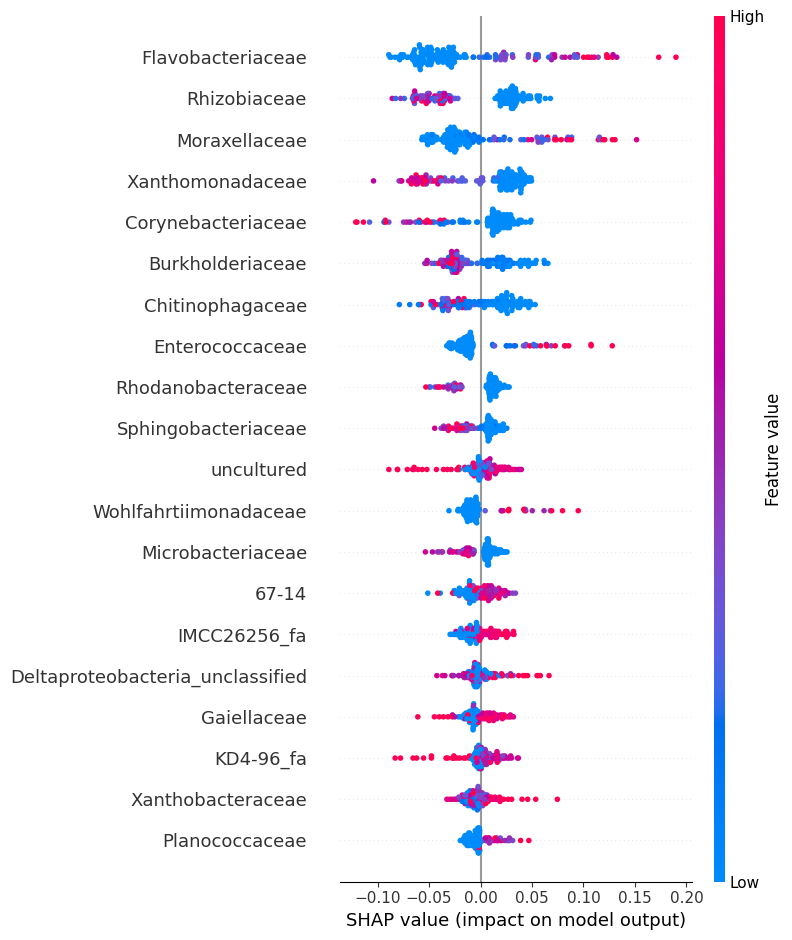

Mean accuracy:0.681250 - Mean AUC:0.821246 - Mean F score:0.659721


In [34]:
dict_cm = RF_model_SCV_multi(X_FS, y, plot=True,columnnames=selectedASV,SMOTE=True,k=5)

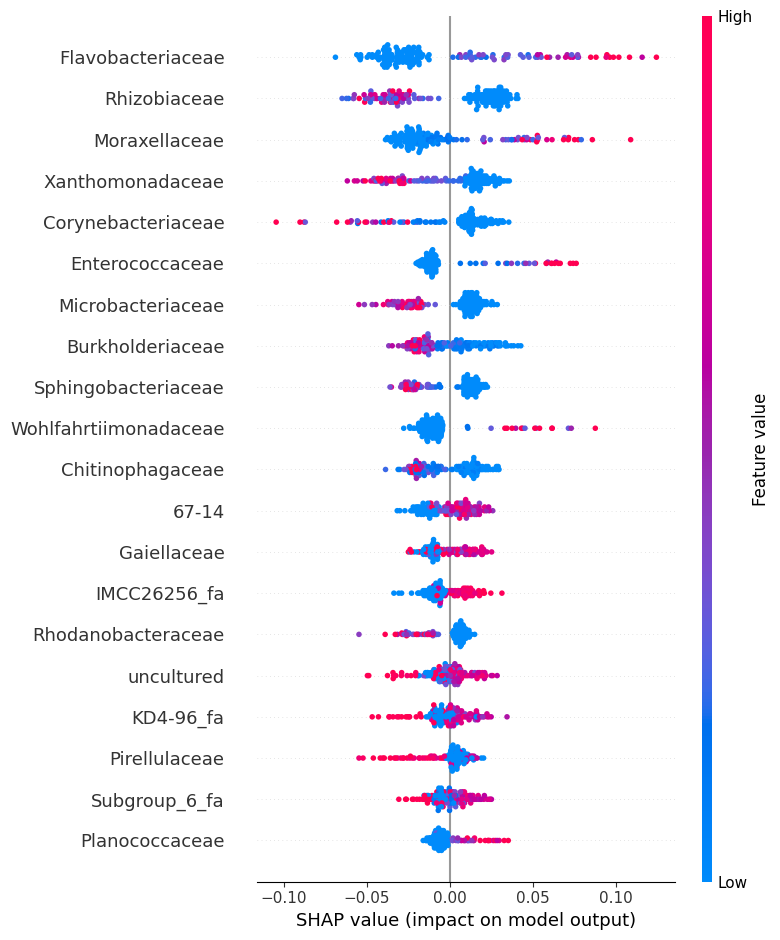

In [24]:
dict_cm_full = RF_model_SCV_multi(data, y, plot=True,columnnames=featurs_family,SMOTE=True,k=5)


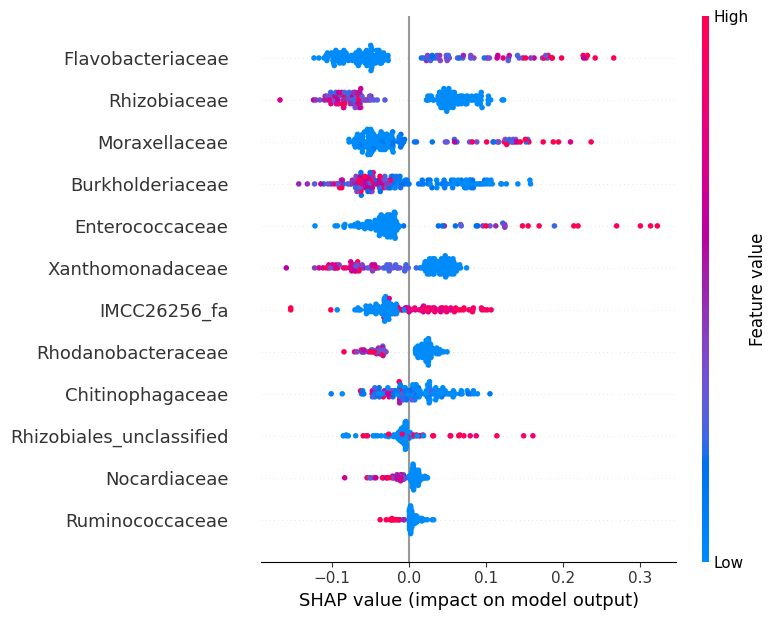

In [25]:
dict_cm_lasso = RF_model_SCV_multi(X_lasso_ft, y, plot=True,columnnames=featurs_family[selectedOTU_index_Lasso],SMOTE=True,k=5)


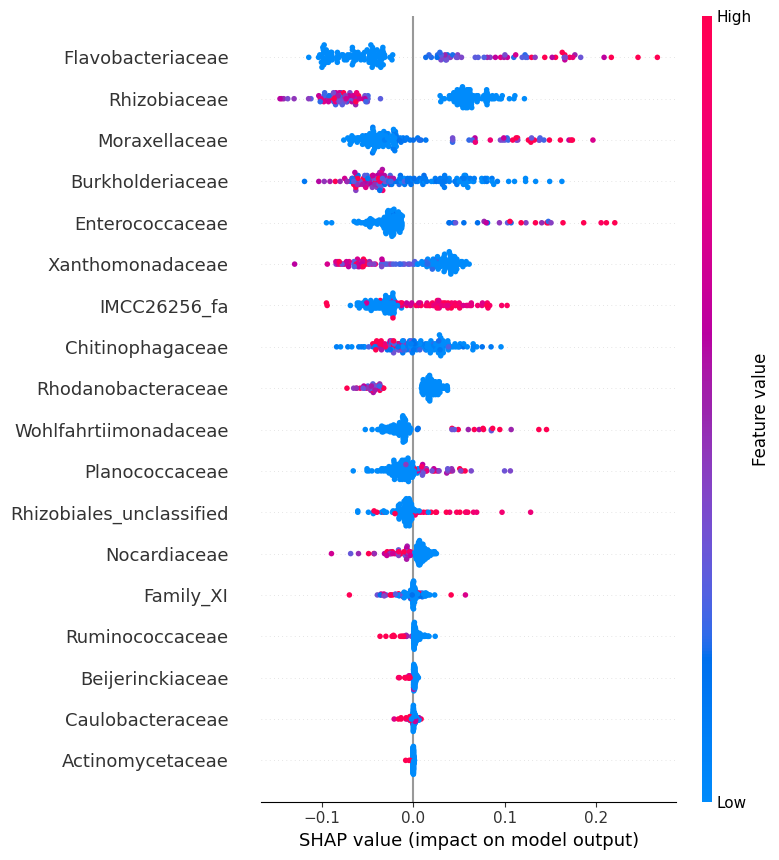

0.64375 0.8293978414373152 0.6280574133586655


In [26]:
dict_cm_fs_lasso = RF_model_SCV_multi(X_FS_lasso_ft, y, plot=True,columnnames=featurs_family[selectedOTU_index_FS_lasso],SMOTE=True,k=5)
print(dict_cm_fs_lasso['mean_accuracy'],dict_cm_fs_lasso['mean_auc'],dict_cm_fs_lasso['mean_f'])

In [27]:
print(target_variable.value_counts())
print(f'The shape of the original dataset is ',np.shape(data))
print(f'The shape of the SelectMicro dataset is ',np.shape(X_FS))
print(f'The shape of the Lasso_finetune selected dataset is ',np.shape(X_lasso_ft))
print(f'The shape of the FS_Lasso_finetune selected dataset is ',np.shape(X_FS_lasso_ft))


Phase
DECLINE    64
BLOOM      48
CLIMAX     48
Name: count, dtype: int64
The shape of the original dataset is  (160, 442)
The shape of the SelectMicro dataset is  (160, 49)
The shape of the Lasso_finetune selected dataset is  (160, 12)
The shape of the FS_Lasso_finetune selected dataset is  (160, 18)


In [28]:
print(dict_cm_full['mean_accuracy'],dict_cm_full['mean_auc'],dict_cm_full['mean_f'])
print(dict_cm['mean_accuracy'],dict_cm['mean_auc'],dict_cm['mean_f'])
print(dict_cm_lasso['mean_accuracy'],dict_cm_lasso['mean_auc'],dict_cm_lasso['mean_f'])
print(dict_cm_fs_lasso['mean_accuracy'],dict_cm_fs_lasso['mean_auc'],dict_cm_fs_lasso['mean_f'])

0.65 0.8095109843965679 0.635708300728254
0.68125 0.8212459105222262 0.659721406803601
0.64375 0.8122948237879587 0.632748171895483
0.64375 0.8293978414373152 0.6280574133586655


In [29]:
def compare2sets(series1, series2):
    # Convert inputs to sets
    set1 = set(series1)
    set2 = set(series2)
    
    # Compute different categories
    common = set1 & set2  # Elements in both
    only_in_1 = set1 - set2  # Elements only in series1
    only_in_2 = set2 - set1  # Elements only in series2
    
    # Construct 2x2 matrix
    matrix = np.array([
        [str(common), str(only_in_2)], 
        [str(only_in_1), ""]  # Bottom-right stays blank
    ])
    # Ensure full display of contents
    pd.set_option("display.max_colwidth", None)
    
    return pd.DataFrame(matrix, index=["In Series1", "Not in Series1"], columns=["In Series2", "Not in Series2"])


In [30]:
# compare FS and Lasso

selectedASV
featurs_family[selectedOTU_index_Lasso]
print(compare2sets(selectedASV,featurs_family[selectedOTU_index_Lasso]))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    In Series2  \
In Series1                                                                                                                                                                                                                                                            

In [31]:
import scikit_posthocs as sp

In [36]:
# test Dunn test
df = pd.DataFrame({'values': ARF_16S_ctb_family['Flavobacteriaceae'], 'groups': y})
dunn_results = sp.posthoc_dunn(df, val_col='values', group_col='groups', p_adjust='bonferroni')
print(dunn_results)

          1         2         3
1  1.000000  0.015551  0.001498
2  0.015551  1.000000  1.000000
3  0.001498  1.000000  1.000000


In [54]:
X_FS_df =pd.DataFrame(X_FS,columns = selectedASV)

df = pd.DataFrame({'values': X_FS_df['Flavobacteriaceae'], 'groups': y})
dunn_results = sp.posthoc_dunn(df, val_col='values', group_col='groups', p_adjust='bonferroni')
print(dunn_results)
print(dunn_results.iloc[2,0])

          1         2         3
1  1.000000  0.000203  0.000476
2  0.000203  1.000000  1.000000
3  0.000476  1.000000  1.000000
0.00047597590370861457


In [58]:
results_dunn = {}
for column in X_FS_df.columns:
    df_dunntest = X_FS_df
    df_dunntest['Group'] = y
    dunn_results = sp.posthoc_dunn(df_dunntest, val_col=column, group_col='Group', p_adjust='bonferroni')
    print('{}:Group 1 vs 2:{:.4f} - Group 1 vs 3:{:.4f} - Group 2 vs 3:{:.4f}'.format(column,dunn_results.iloc[1,0],dunn_results.iloc[2,0],dunn_results.iloc[2,1])) 
    results_dunn[column] = dunn_results


Chitinophagaceae:Group 1 vs 2:1.0000 - Group 1 vs 3:0.0000 - Group 2 vs 3:0.0000
Xanthomonadaceae:Group 1 vs 2:0.0581 - Group 1 vs 3:0.0000 - Group 2 vs 3:0.0001
Rhodanobacteraceae:Group 1 vs 2:0.6986 - Group 1 vs 3:0.0000 - Group 2 vs 3:0.0000
Rhizobiaceae:Group 1 vs 2:0.0001 - Group 1 vs 3:0.0000 - Group 2 vs 3:0.2701
Enterococcaceae:Group 1 vs 2:0.0026 - Group 1 vs 3:0.0000 - Group 2 vs 3:0.1023
Corynebacteriaceae:Group 1 vs 2:0.0000 - Group 1 vs 3:0.0061 - Group 2 vs 3:0.0123
Microbacteriaceae:Group 1 vs 2:0.0128 - Group 1 vs 3:0.0000 - Group 2 vs 3:0.0709
Wohlfahrtiimonadaceae:Group 1 vs 2:0.0001 - Group 1 vs 3:0.0000 - Group 2 vs 3:1.0000
Nocardiaceae:Group 1 vs 2:0.0506 - Group 1 vs 3:0.0000 - Group 2 vs 3:0.0228
Burkholderiaceae:Group 1 vs 2:0.0036 - Group 1 vs 3:0.0000 - Group 2 vs 3:0.2724
Beijerinckiaceae:Group 1 vs 2:1.0000 - Group 1 vs 3:0.0000 - Group 2 vs 3:0.0006
Sphingobacteriaceae:Group 1 vs 2:0.0024 - Group 1 vs 3:0.0000 - Group 2 vs 3:0.5529
Sphingomonadaceae:Group 

In [45]:
results_dunn[]

{'Chitinophagaceae':               1             2             3
 1  1.000000e+00  1.000000e+00  7.664030e-11
 2  1.000000e+00  1.000000e+00  3.243396e-08
 3  7.664030e-11  3.243396e-08  1.000000e+00,
 'Xanthomonadaceae':               1         2             3
 1  1.000000e+00  0.058077  3.948814e-11
 2  5.807712e-02  1.000000  5.948120e-05
 3  3.948814e-11  0.000059  1.000000e+00,
 'Rhodanobacteraceae':               1         2             3
 1  1.000000e+00  0.698550  6.117606e-10
 2  6.985505e-01  1.000000  1.114934e-06
 3  6.117606e-10  0.000001  1.000000e+00,
 'Rhizobiaceae':               1         2             3
 1  1.000000e+00  0.000143  4.529438e-09
 2  1.427099e-04  1.000000  2.700934e-01
 3  4.529438e-09  0.270093  1.000000e+00,
 'Enterococcaceae':               1         2             3
 1  1.000000e+00  0.002613  4.090759e-08
 2  2.612872e-03  1.000000  1.023133e-01
 3  4.090759e-08  0.102313  1.000000e+00,
 'Corynebacteriaceae':               1             2         3